/tmp/ipykernel_42/4072455916.py:56: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["title_length"], kde=False, rug=False,


Mean Squared Error: 48074333989824.75


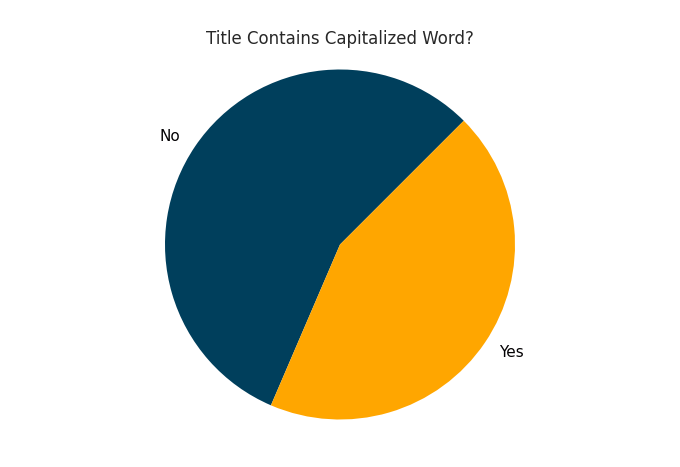

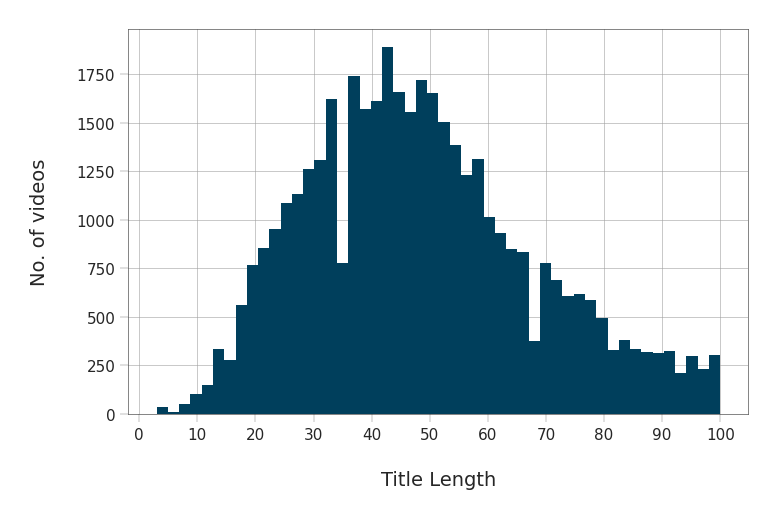

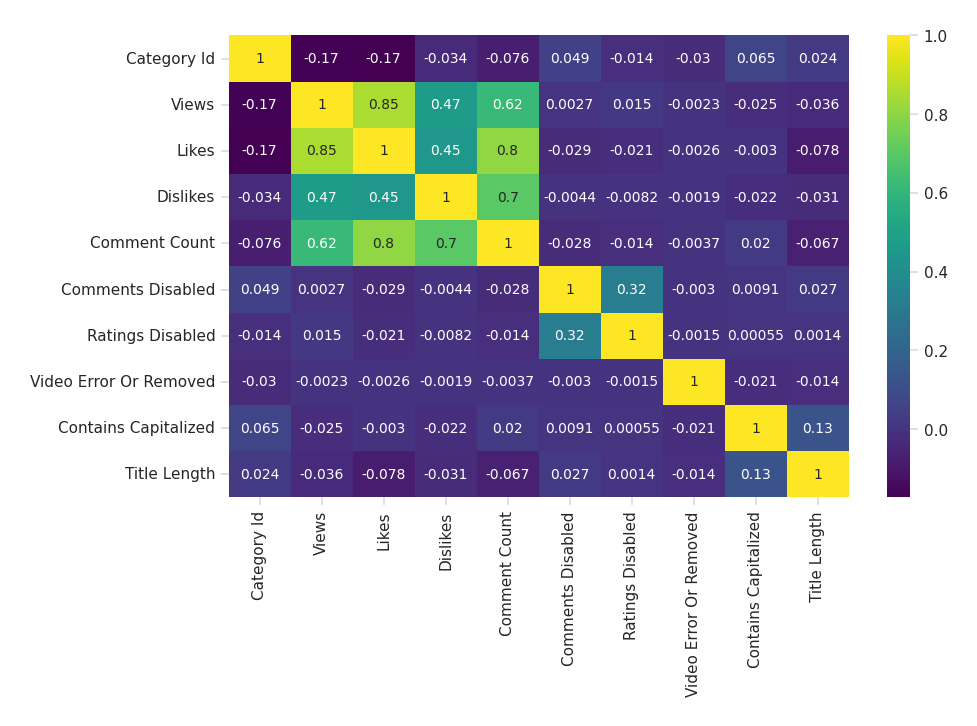

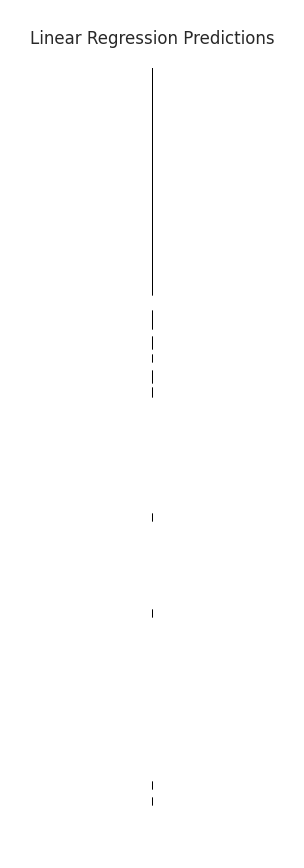

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import wordcloud

# Setting up plotting styles
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

# Loading Dataset
# Make sure to provide the correct path or URL to your dataset
df = pd.read_csv("/kaggle/input/youtube-new/USvideos.csv")

# Handling Missing Values
df["description"] = df["description"].fillna(value="")

# Descriptive Statistics
df.describe()

# Title Capitalization Check
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False

df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

# Pie Chart for Capitalized Words
value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'],
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

# Histogram for Title Length
df["title_length"] = df["title"].apply(lambda x: len(x))
fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False,
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

# Correlation Heatmap
numeric_columns = df.select_dtypes(include=['number', 'bool']).columns
h_labels = [x.replace('_', ' ').title() for x in list(numeric_columns)]
fig, ax = plt.subplots(figsize=(10, 6))
_ = sns.heatmap(df[numeric_columns].corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap='viridis', ax=ax)

# Word Cloud for Video Titles
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
wc = wordcloud.WordCloud(width=1200, height=500,
                         collocations=False, background_color="white",
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15, 10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

# Machine Learning Section
# Selecting features and target variable
features = df[['title_length']]
target = df['views']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualizing the predictions
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)
plt.xlabel('Title Length')
plt.ylabel('Views')
plt.title('Linear Regression Predictions')
plt.show()


/tmp/ipykernel_42/3576607139.py:60: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["title_length"], kde=False, rug=False,


Mean Squared Error: 48074333989824.75


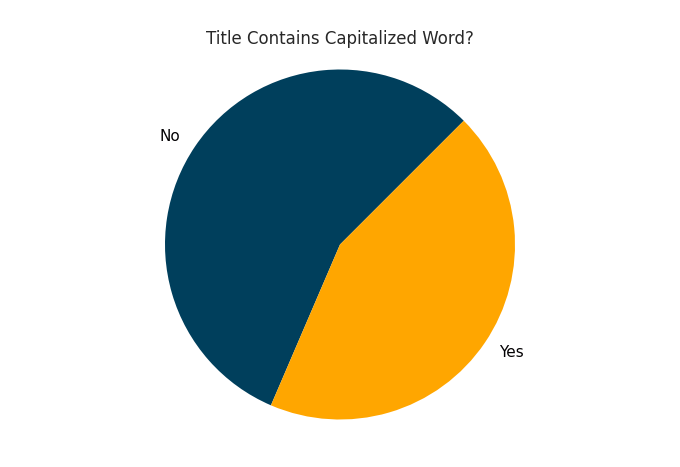

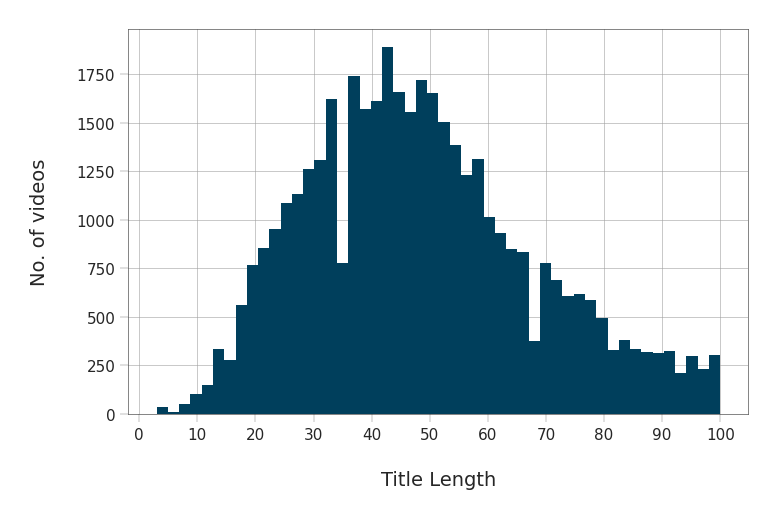

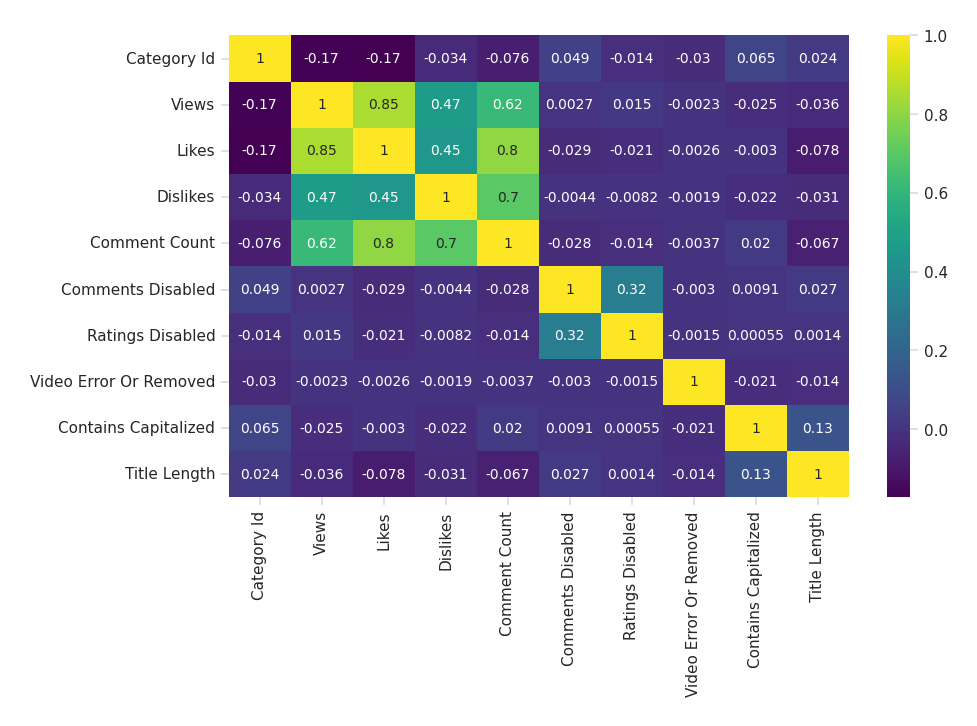

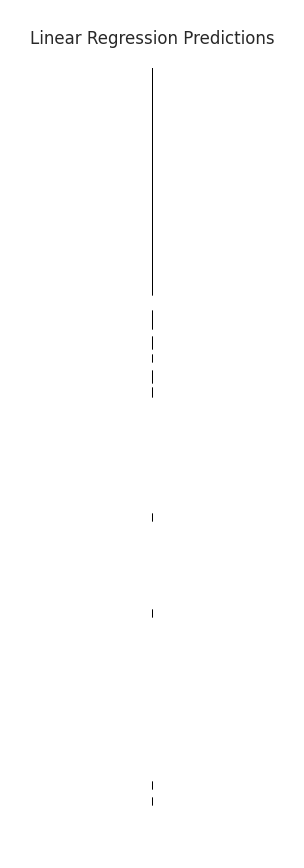

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import wordcloud

# Setting up plotting styles
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

# Specify the correct dataset path
dataset_path = "/kaggle/input/youtube-new/USvideos.csv"

# Check if the file exists
if os.path.exists(dataset_path):
    # Load the dataset
    df = pd.read_csv(dataset_path)
    
    # Handling Missing Values
    df["description"] = df["description"].fillna(value="")
    
    # Descriptive Statistics
    df.describe()
    
    # Title Capitalization Check
    def contains_capitalized_word(s):
        for w in s.split():
            if w.isupper():
                return True
        return False
    
    df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)
    
   
    # Pie Chart for Capitalized Words
value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'],
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

# Histogram for Title Length
df["title_length"] = df["title"].apply(lambda x: len(x))
fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False,
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

# Correlation Heatmap
numeric_columns = df.select_dtypes(include=['number', 'bool']).columns
h_labels = [x.replace('_', ' ').title() for x in list(numeric_columns)]
fig, ax = plt.subplots(figsize=(10, 6))
_ = sns.heatmap(df[numeric_columns].corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap='viridis', ax=ax)

# Word Cloud for Video Titles
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
wc = wordcloud.WordCloud(width=1200, height=500,
                         collocations=False, background_color="white",
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15, 10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

# Machine Learning Section
# Selecting features and target variable
features = df[['title_length']]
target = df['views']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating a lOGISTIC regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
    
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)
plt.xlabel('Title Length')
plt.ylabel('Views')
plt.title('Linear Regression Predictions')
plt.show()


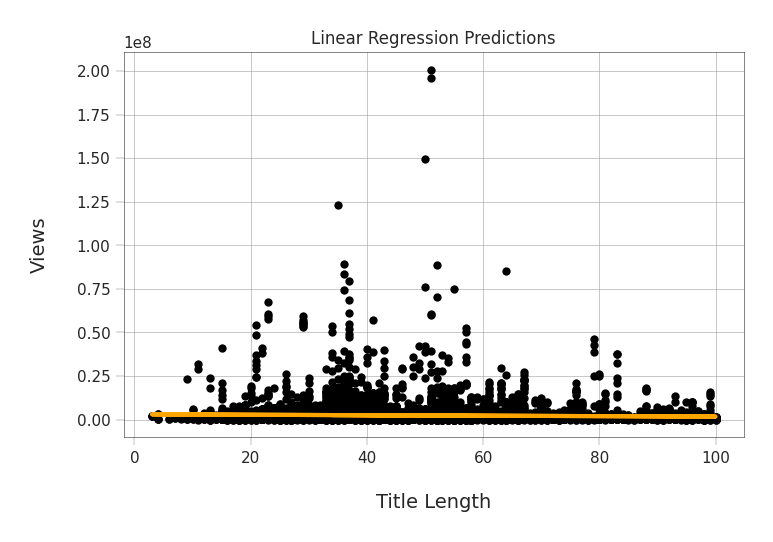

In [3]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, predictions, color='ORANGE', linewidth=3)
plt.xlabel('Title Length')
plt.ylabel('Views')
plt.title('Linear Regression Predictions')
plt.show()
